Here is some code for importing Python modules

In [10]:
import numpy as np

import pandas as pd

import scipy as sp

import matplotlib

import matplotlib.pyplot as plt

% matplotlib inline

Here is an example of a simple graph:

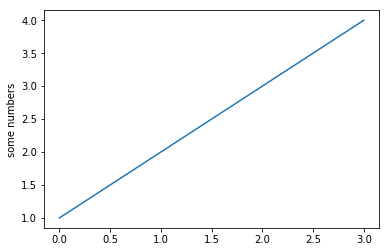

In [4]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')

Another example of graphing:

Now, to control STK:

In [5]:
import os

import win32com.client as win32

import datetime

import pandas as pd

In [7]:
stk_app = win32.gencache.EnsureDispatch('STK11.Application')

STK = stk_app.Personality

root = stk_app.Personality2

stk_app.Visible = True

Stop at this point, open a new scenario, get the satellite name and figure out what result value you want. 

In [540]:
g_gatorDefn = STK.scenario(0).Satellite("TestSat").GetAstrogatorDefn()

class STKOutput:
    
    def __init__(self):
        
        self.events = []
        self.results = None
        self._rowNames = None
        self._df = None   # semi-private
     
    def add(self, eventName, quantity, unit):
        self.events.append( [eventName, quantity, unit] )
        
    #def initialize(self, num):
        #self.results = np.zeros([len(self.events),num])
        
    #def update(self, gatorDefn, index):
        #for (eventRow, resultRow) in zip(self.events, self.results):
            #seg = gatorDefn.GetSegmentByName(eventRow[0])
            #resultRow[index] = seg.GetResultValue(eventRow[1]).Getin(eventRow[2]).value
    
    def update(self, gatorDefn, index):
        tempArray = np.zeros([1,len(self.events)])
        for i,eventRow in enumerate(self.events):
            seg = gatorDefn.GetSegmentByName(eventRow[0])
            tempArray[0,i] = seg.GetResultValue(eventRow[1]).Getin(eventRow[2]).value
        print(tempArray.T)
        print(tempArray.T.shape)
        if self.results is None:
            self.results = tempArray.T
        else:
            self.results = np.concatenate((self.results,tempArray.T),axis=1)
            
    def saveCSV(self,path):
        self.df.transpose().to_csv(path)
        
    @classmethod
    def loadCSV(cls,path):
        c = cls()
        c._df = pd.read_csv(path,index_col=0)
        c.results = c._df.as_matrix()
        c._rowNames = c._df.index.values.tolist()
        c.events = list(c.df.index.map(lambda x: x.replace(')','')).map(lambda x: x.replace('(','')).str.split(" ").values)
        return c
            
    @property
    def rowNames(self):
        if self._rowNames is None:
            self._rowNames = []
            for row in self.events:
                self._rowNames.append(row[0] + ' ' + row[1] + ' (' + row[2] + ')')
        return self._rowNames
        
    @property
    def df(self):
        if self._df is None:
            self._df = pd.DataFrame(self.results.transpose(),columns=self.rowNames)
        return self._df

myOutputs = STKOutput()

myOutputs.add("Prop_to_apo", "Altitude", "km") 
myOutputs.add("Prop_to_apo", "Orbit_Period", "hr")
    
myOutputs.add("Prop_to_peri", "Altitude", "km")
myOutputs.add("Prop_to_peri", "Orbit_Period", "hr")
    
myOutputs.add("Maneuver", "DeltaV", "m/sec")  



In [541]:
myOutputs

In [542]:
numruns = 10

myOutputs.events



[['Prop_to_apo', 'Altitude', 'km'],
 ['Prop_to_apo', 'Orbit_Period', 'hr'],
 ['Prop_to_peri', 'Altitude', 'km'],
 ['Prop_to_peri', 'Orbit_Period', 'hr'],
 ['Maneuver', 'DeltaV', 'm/sec']]

In [543]:
myOutputs.rowNames

['Prop_to_apo Altitude (km)',
 'Prop_to_apo Orbit_Period (hr)',
 'Prop_to_peri Altitude (km)',
 'Prop_to_peri Orbit_Period (hr)',
 'Maneuver DeltaV (m/sec)']

In [544]:
myOutputs.results

In [545]:
maneuver = g_gatorDefn.GetSegmentByName("Maneuver")

for i in range(numruns):
    tf = maneuver.ImpulsiveMnvr.Cartesian.X.Set(10*i, "m/sec")
    tf = g_gatorDefn.RunMCS()
    myOutputs.update(g_gatorDefn,i)
    
    #results[i,0] = peri.GetResultValue("Altitude").Getin("km").value
    #results[i,1] = apo.GetResultValue("Altitude").Getin("km").value
    #results[i,2] = maneuver.GetResultValue("DeltaV").Getin("m/sec").value

[[ 299.45525587]
 [   1.50854965]
 [ 283.36851454]
 [   1.50864494]
 [   0.        ]]
(5, 1)
[[ 334.20270215]
 [   1.51442278]
 [ 283.36851454]
 [   1.50864494]
 [  10.        ]]
(5, 1)
[[ 369.16627089]
 [   1.52033924]
 [ 283.36851454]
 [   1.50864494]
 [  20.        ]]
(5, 1)
[[ 404.35249527]
 [   1.52629969]
 [ 283.36851454]
 [   1.50864494]
 [  30.        ]]
(5, 1)
[[ 439.76546125]
 [   1.53230559]
 [ 283.36851454]
 [   1.50864494]
 [  40.        ]]
(5, 1)
[[ 475.4084281 ]
 [   1.53835807]
 [ 283.36851454]
 [   1.50864494]
 [  50.        ]]
(5, 1)
[[ 511.28428689]
 [   1.54445803]
 [ 283.36851454]
 [   1.50864494]
 [  60.        ]]
(5, 1)
[[ 547.39573358]
 [   1.55060624]
 [ 283.36851454]
 [   1.50864494]
 [  70.        ]]
(5, 1)
[[ 583.74535481]
 [   1.55680338]
 [ 283.36851454]
 [   1.50864494]
 [  80.        ]]
(5, 1)
[[ 620.33568301]
 [   1.56305012]
 [ 283.36851454]
 [   1.50864494]
 [  90.        ]]
(5, 1)


In [546]:
s = np.zeros([5,3])
print(s)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


And that's all!

In [547]:
myOutputs.results

array([[ 299.45525587,  334.20270215,  369.16627089,  404.35249527,
         439.76546125,  475.4084281 ,  511.28428689,  547.39573358,
         583.74535481,  620.33568301],
       [   1.50854965,    1.51442278,    1.52033924,    1.52629969,
           1.53230559,    1.53835807,    1.54445803,    1.55060624,
           1.55680338,    1.56305012],
       [ 283.36851454,  283.36851454,  283.36851454,  283.36851454,
         283.36851454,  283.36851454,  283.36851454,  283.36851454,
         283.36851454,  283.36851454],
       [   1.50864494,    1.50864494,    1.50864494,    1.50864494,
           1.50864494,    1.50864494,    1.50864494,    1.50864494,
           1.50864494,    1.50864494],
       [   0.        ,   10.        ,   20.        ,   30.        ,
          40.        ,   50.        ,   60.        ,   70.        ,
          80.        ,   90.        ]])

In [548]:
np.savetxt("test.csv",myOutputs.results, delimiter=",")

In [549]:
!more "test.csv"

2.994552558721916284e+02,3.342027021467495729e+02,3.691662708917770601e+02,4.043524952712768368e+02,4.397654612474453870e+02,4.754084280958695672e+02,5.112842868925695257e+02,5.473957335801170530e+02,5.837453548084247359e+02,6.203356830058977494e+02
1.508549653602754503e+00,1.514422779996963619e+00,1.520339236894433066e+00,1.526299688272273469e+00,1.532305589915368582e+00,1.538358069875672252e+00,1.544458030666684634e+00,1.550606237889665007e+00,1.556803384798315371e+00,1.563050117939918993e+00
2.833685145353209691e+02,2.833685145353209691e+02,2.833685145353209691e+02,2.833685145353209691e+02,2.833685145353209691e+02,2.833685145353209691e+02,2.833685145353209691e+02,2.833685145353209691e+02,2.833685145353209691e+02,2.833685145353209691e+02
1.508644935592839076e+00,1.508644935592839076e+00,1.508644935592839076e+00,1.508644935592839076e+00,1.508644935592839076e+00,1.508644935592839076e+00,1.508644935592839076e+00,1.508644935592839076e+00,1.508644935592839076e+00,1.508644935592839076e+00


In [550]:
myOutputs.df

Prop_to_apo Altitude (km)  Prop_to_apo Orbit_Period (hr)  \
0                 299.455256                       1.508550   
1                 334.202702                       1.514423   
2                 369.166271                       1.520339   
3                 404.352495                       1.526300   
4                 439.765461                       1.532306   
5                 475.408428                       1.538358   
6                 511.284287                       1.544458   
7                 547.395734                       1.550606   
8                 583.745355                       1.556803   
9                 620.335683                       1.563050   

   Prop_to_peri Altitude (km)  Prop_to_peri Orbit_Period (hr)  \
0                  283.368515                        1.508645   
1                  283.368515                        1.508645   
2                  283.368515                        1.508645   
3                  283.368515                        1.508645   
4                  283.368515                        1.508645   
5                  283.368515                        1.508645   
6                  283.368515                        1.508645   
7                  283.368515                        1.508645   
8                  283.368515                        1.508645   
9                  283.368515                        1.508645   

   Maneuver DeltaV (m/sec)  
0                      0.0  
1                     10.0  
2                     20.0  
3                     30.0  
4                     40.0  
5                     50.0  
6                     60.0  
7                     70.0  
8                     80.0  
9                     90.0

In [551]:
a = myOutputs.df

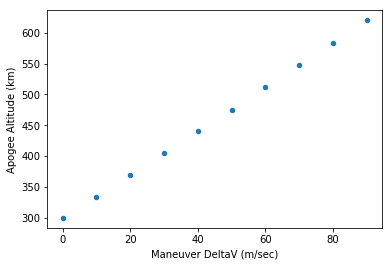

In [552]:
ax = a.plot.scatter('Maneuver DeltaV (m/sec)', 'Prop_to_apo Altitude (km)')
ax.set_ylabel('Apogee Altitude (km)')

In [553]:
a.transpose()

0           1           2  \
Prop_to_apo Altitude (km)       299.455256  334.202702  369.166271   
Prop_to_apo Orbit_Period (hr)     1.508550    1.514423    1.520339   
Prop_to_peri Altitude (km)      283.368515  283.368515  283.368515   
Prop_to_peri Orbit_Period (hr)    1.508645    1.508645    1.508645   
Maneuver DeltaV (m/sec)           0.000000   10.000000   20.000000   

                                         3           4           5  \
Prop_to_apo Altitude (km)       404.352495  439.765461  475.408428   
Prop_to_apo Orbit_Period (hr)     1.526300    1.532306    1.538358   
Prop_to_peri Altitude (km)      283.368515  283.368515  283.368515   
Prop_to_peri Orbit_Period (hr)    1.508645    1.508645    1.508645   
Maneuver DeltaV (m/sec)          30.000000   40.000000   50.000000   

                                         6           7           8           9  
Prop_to_apo Altitude (km)       511.284287  547.395734  583.745355  620.335683  
Prop_to_apo Orbit_Period (hr)     1.544458    1.550606    1.556803    1.563050  
Prop_to_peri Altitude (km)      283.368515  283.368515  283.368515  283.368515  
Prop_to_peri Orbit_Period (hr)    1.508645    1.508645    1.508645    1.508645  
Maneuver DeltaV (m/sec)          60.000000   70.000000   80.000000   90.000000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C27C668908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001C27C788E80>], dtype=object)

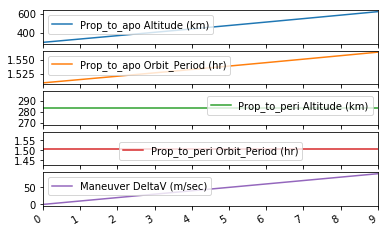

In [554]:
a.plot(subplots=True)

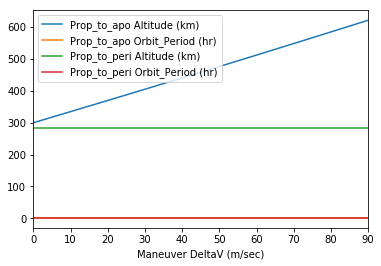

In [555]:
a.plot.line("Maneuver DeltaV (m/sec)")

In [556]:
myOutputs.saveCSV("dataFrame.csv")

In [557]:
b = STKOutput.loadCSV("dataFrame.csv")

In [558]:
b._df

0           1           2  \
Prop_to_apo Altitude (km)       299.455256  334.202702  369.166271   
Prop_to_apo Orbit_Period (hr)     1.508550    1.514423    1.520339   
Prop_to_peri Altitude (km)      283.368515  283.368515  283.368515   
Prop_to_peri Orbit_Period (hr)    1.508645    1.508645    1.508645   
Maneuver DeltaV (m/sec)           0.000000   10.000000   20.000000   

                                         3           4           5  \
Prop_to_apo Altitude (km)       404.352495  439.765461  475.408428   
Prop_to_apo Orbit_Period (hr)     1.526300    1.532306    1.538358   
Prop_to_peri Altitude (km)      283.368515  283.368515  283.368515   
Prop_to_peri Orbit_Period (hr)    1.508645    1.508645    1.508645   
Maneuver DeltaV (m/sec)          30.000000   40.000000   50.000000   

                                         6           7           8           9  
Prop_to_apo Altitude (km)       511.284287  547.395734  583.745355  620.335683  
Prop_to_apo Orbit_Period (hr)     1.544458    1.550606    1.556803    1.563050  
Prop_to_peri Altitude (km)      283.368515  283.368515  283.368515  283.368515  
Prop_to_peri Orbit_Period (hr)    1.508645    1.508645    1.508645    1.508645  
Maneuver DeltaV (m/sec)          60.000000   70.000000   80.000000   90.000000

In [559]:
b.rowNames

['Prop_to_apo Altitude (km)',
 'Prop_to_apo Orbit_Period (hr)',
 'Prop_to_peri Altitude (km)',
 'Prop_to_peri Orbit_Period (hr)',
 'Maneuver DeltaV (m/sec)']

In [560]:
b.events

[['Prop_to_apo', 'Altitude', 'km'],
 ['Prop_to_apo', 'Orbit_Period', 'hr'],
 ['Prop_to_peri', 'Altitude', 'km'],
 ['Prop_to_peri', 'Orbit_Period', 'hr'],
 ['Maneuver', 'DeltaV', 'm/sec']]

In [422]:
myOutputs.events

[['Prop_to_apo', 'Altitude', 'km'],
 ['Prop_to_apo', 'Orbit_Period', 'hr'],
 ['Prop_to_peri', 'Altitude', 'km'],
 ['Prop_to_peri', 'Orbit_Period', 'hr'],
 ['Maneuver', 'DeltaV', 'm/sec']]